In [2]:
from model.core import run_simulation
from configs.example_dg8_nashir import get_config

cfg = get_config()
state, log = run_simulation(cfg, with_log=True)


In [9]:
from model.core import SimulationConfig, run_simulation

# --- Config: DG 10★ + Nashir + Combo Mastery ---
cfg = get_config()

state, log = run_simulation(cfg, with_log=True)

# --- Print per-round breakdown ---
print("DG 10★ + Nashir + Combo Mastery")
print("Round |    Basic |    Flame |   Breath |      Bolt |    Other |     Total")
print("----------------------------------------------------------------------------")
for row in log:
    total = row["basic"] + row["flame"] + row["breath"] + row["bolt"] + row["other"]
    print(
        f"{row['round']:5d} |"
        f"{row['basic']:8.0f} |"
        f"{row['flame']:8.0f} |"
        f"{row['breath']:8.0f} |"
        f"{row['bolt']:9.0f} |"
        f"{row['other']:8.0f} |"
        f"{total:9.0f}"
    )

# --- Totals ---
total_all = (
    state.dmg_basic
    + state.dmg_flame
    + state.dmg_breath
    + state.dmg_bolt
    + state.dmg_other
)

print("\nTotals over", cfg.rounds, "rounds:")
print(f" basic  = {state.dmg_basic:.0f}")
print(f" flame  = {state.dmg_flame:.0f}")
print(f" breath = {state.dmg_breath:.0f}")
print(f" bolt   = {state.dmg_bolt:.0f}")
print(f" other  = {state.dmg_other:.0f}")
print(f" total  = {total_all:.0f}")



DG 10★ + Nashir + Combo Mastery
Round |    Basic |    Flame |   Breath |      Bolt |    Other |     Total
----------------------------------------------------------------------------
    1 |   89424 |  719325 |  897000 |  1214490 |       0 |  2920239
    2 |  184092 | 1950975 |       0 |  2936419 |       0 |  5071486
    3 |  232392 | 1816425 | 1311000 |  7690326 |       0 | 11050143
    4 |  366666 | 3590415 |       0 |  1930165 |       0 |  5887246
    5 |  375360 | 2898000 | 1380000 |  4418967 |       0 |  9072327
    6 |  495144 | 4802400 |       0 | 16517537 |       0 | 21815081
    7 |  485760 | 3726000 | 1380000 |  8537605 |       0 | 14129365
    8 |  622104 | 6003000 |       0 | 13703918 |       0 | 20329022
    9 |  596160 | 4554000 | 1380000 | 23720130 |       0 | 30250290
   10 |  749064 | 7203600 |       0 | 10914158 |       0 | 18866822
   11 |  706560 | 5382000 | 1380000 | 18234989 |       0 | 25703549
   12 |  876024 | 8404200 |       0 | 28178896 |       0 | 37459120
 

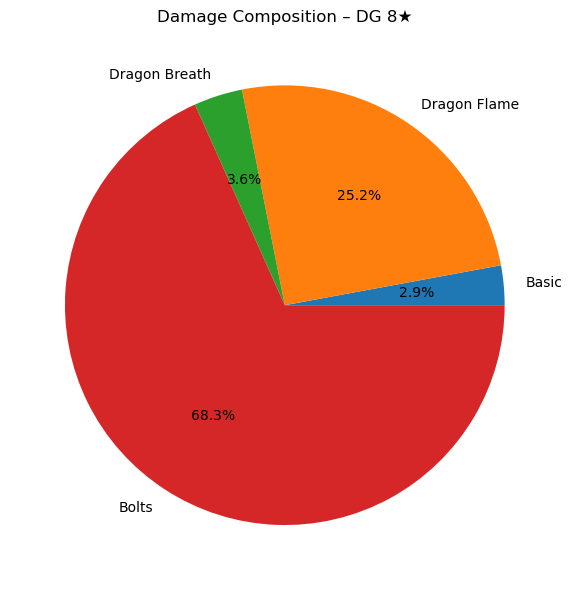

Damage composition (totals and %):
Basic        : 8,526,054.0  (  2.9%)
Dragon Flame : 73,903,140.0  ( 25.2%)
Dragon Breath: 10,488,000.0  (  3.6%)
Bolts        : 200,193,653.7  ( 68.3%)


In [10]:
import matplotlib.pyplot as plt

# --- Aggregate totals from the simulation state ---
basic_total  = state.dmg_basic
flame_total  = state.dmg_flame
breath_total = state.dmg_breath
bolt_total   = state.dmg_bolt
other_total  = state.dmg_other

labels = ["Basic", "Dragon Flame", "Dragon Breath", "Bolts", "Other"]
values = [basic_total, flame_total, breath_total, bolt_total, other_total]

# Optionally filter out zero components so the pie is cleaner
labels_nonzero = []
values_nonzero = []
for lbl, val in zip(labels, values):
    if val > 0:
        labels_nonzero.append(lbl)
        values_nonzero.append(val)

# --- Pie chart ---
plt.figure(figsize=(6, 6))
plt.pie(
    values_nonzero,
    labels=labels_nonzero,
    autopct=lambda p: f"{p:.1f}%"
)
title_adv = f"{cfg.adventurer} {cfg.star}★" if hasattr(cfg, "adventurer") else "Adventurer"
plt.title(f"Damage Composition – {title_adv}")
plt.tight_layout()
plt.show()

total_damage = sum(values)
print("Damage composition (totals and %):")
for lbl, val in zip(labels, values):
    if val <= 0:
        continue
    pct = val / total_damage * 100
    print(f"{lbl:13s}: {val:,.1f}  ({pct:5.1f}%)")


In [11]:
import pandas as pd
from model.core import SimulationConfig, run_simulation

rows = []

for star in range(0, 11):
    cfg = SimulationConfig(
        adventurer="DG",
        star=star,
        weapon="Nashir",
        combo_mastery=False,
        use_extra_end_bolts=False,
        basic_atk_bolt_level=0,
        five_bolts_from_round6=False,
        rounds=15,
        basic_hits_per_round=5,
        seed=12345,
    )

    state, log = run_simulation(cfg, with_log=True)

    total = (state.dmg_basic +
             state.dmg_flame +
             state.dmg_breath +
             state.dmg_bolt +
             state.dmg_other)

    rows.append({
        "star": star,
        "total": total,
        "basic": state.dmg_basic,
        "flame": state.dmg_flame,
        "breath": state.dmg_breath,
        "bolt": state.dmg_bolt,
        "other": state.dmg_other,
        "avg_per_round": total / cfg.rounds,
    })

df = pd.DataFrame(rows)
df


,star,total,basic,flame,breath,bolt,other,avg_per_round
0,0,15668520.0,1035000.0,3881250.0,0.0,10752270.0,0.0,1044568.0
1,1,15668520.0,1035000.0,3881250.0,0.0,10752270.0,0.0,1044568.0
2,2,19549770.0,1035000.0,7762500.0,0.0,10752270.0,0.0,1303318.0
3,3,19549770.0,1035000.0,7762500.0,0.0,10752270.0,0.0,1303318.0
4,4,23396520.0,1035000.0,8849250.0,2760000.0,10752270.0,0.0,1559768.0
5,5,33704430.0,1955460.0,15752700.0,5244000.0,10752270.0,0.0,2246962.0
6,6,33704430.0,1955460.0,15752700.0,5244000.0,10752270.0,0.0,2246962.0
7,7,40035180.0,1955460.0,16839450.0,10488000.0,10752270.0,0.0,2669012.0
8,8,44492511.0,2100360.0,17926200.0,10488000.0,13977951.0,0.0,2966167.4
9,9,44492511.0,2100360.0,17926200.0,10488000.0,13977951.0,0.0,2966167.4


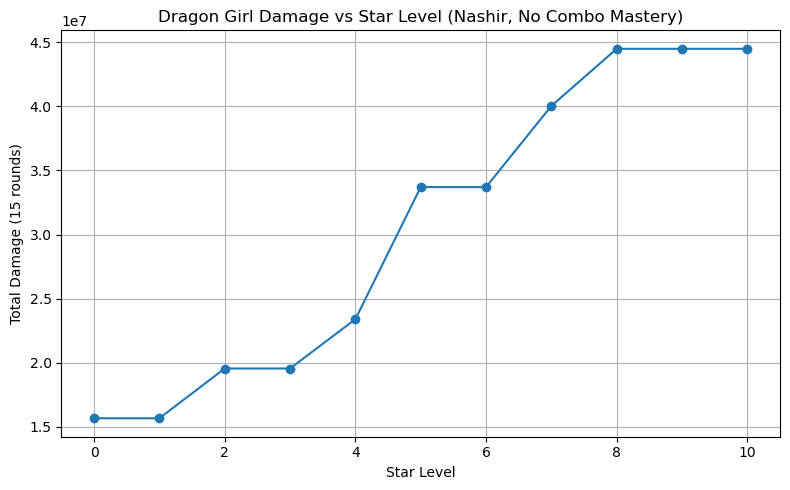

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(df["star"], df["total"], marker="o")
plt.title("Dragon Girl Damage vs Star Level (Nashir, No Combo Mastery)")
plt.xlabel("Star Level")
plt.ylabel("Total Damage (15 rounds)")
plt.grid(True)
plt.tight_layout()
plt.show()


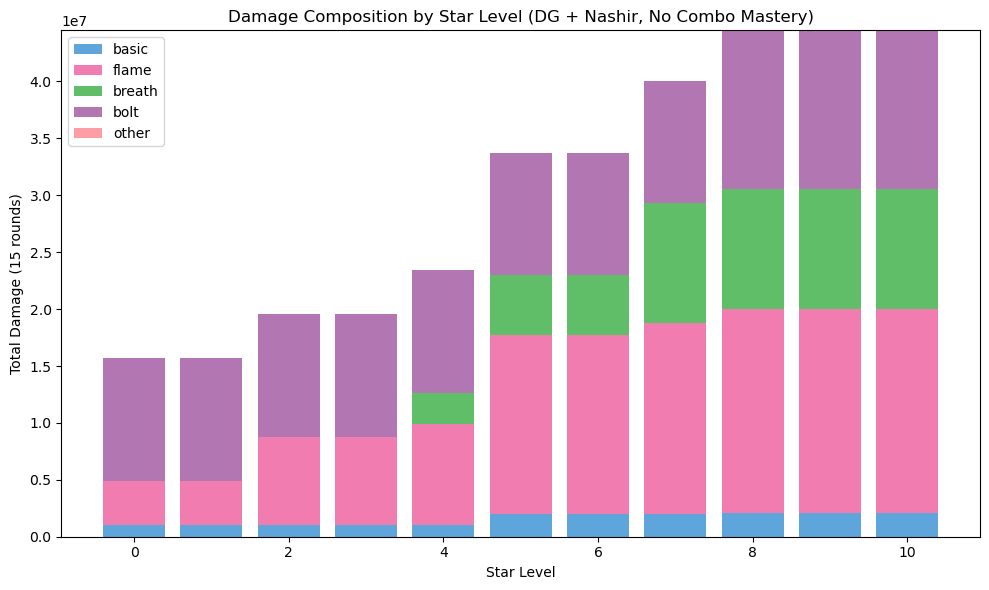

In [14]:
plt.figure(figsize=(10, 6))

bottom = None
components = ["basic", "flame", "breath", "bolt", "other"]
colors = ["#5DA5DA", "#F17CB0", "#60BD68", "#B276B2", "#FF9DA7"]

for comp, color in zip(components, colors):
    if bottom is None:
        plt.bar(df["star"], df[comp], label=comp, color=color)
        bottom = df[comp].copy()
    else:
        plt.bar(df["star"], df[comp], bottom=bottom, label=comp, color=color)
        bottom += df[comp]

plt.title("Damage Composition by Star Level (DG + Nashir, No Combo Mastery)")
plt.xlabel("Star Level")
plt.ylabel("Total Damage (15 rounds)")
plt.legend()
plt.tight_layout()
plt.show()
